# MSA 2024 Phase 2 - Part 1


In [700]:
import sklearn  # Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
import numpy as np  # NumPy is used for handling numerical series operations (addition, multiplication, and ...)
import pandas as pd  # Pandas library is used for handling tabular data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

### 1.1 Load data and display

In [701]:
# Read file
df = pd.read_csv("../0. Resources/datasets/X store sales/store_sales.csv", encoding='latin_1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [702]:
# Get more information about the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [703]:
# Display the first ten instances
df.iloc[0:10]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


### 1.2 Find key statistical measures

In [704]:
# Find key statistical measures such as mean and standard deviation.
mean_sales = df["Sales"].mean()
mean_quantity = df["Quantity"].mean()
mean_discount = df["Discount"].mean()
mean_profit = df["Profit"].mean()
print(mean_sales, mean_quantity, mean_discount, mean_profit)

df[["Sales","Quantity","Discount","Profit"]].describe()

349.8348869872702 3.785007072135785 0.1739226779820839 8.699327109853845


,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,349.834887,3.785007,0.173923,8.699327
std,503.179145,2.251620,0.181547,136.049246
min,1.892000,1.000000,0.000000,-1862.312400
25%,47.040000,2.000000,0.000000,-12.849000
50%,182.220000,3.000000,0.200000,7.774800
75%,435.168000,5.000000,0.300000,33.726600
max,4416.174000,14.000000,0.700000,1013.127000


### 1.3 Visualize numerical columns

#### 1.3.1 Sales with respect to profit

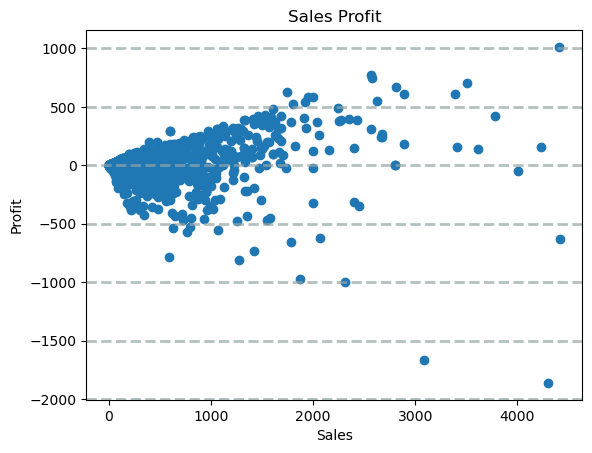

In [705]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a scatter plot of Sales vs Profit
plt.scatter(x= df.Sales, y= df.Profit) 

# Customize the chart
plt.title('Sales Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

#### 1.3.2 Sales with respect to quantity

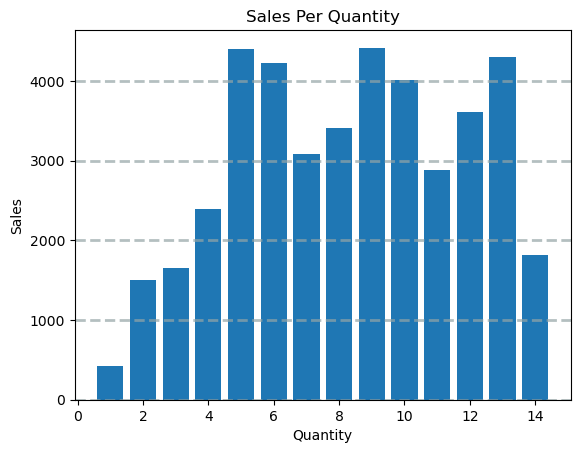

In [706]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a bar plot of Quantity vs Sales
plt.bar(x= df.Quantity,height= df.Sales) 

# Customize the chart
plt.title('Sales Per Quantity')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

#### 1.3.3 Sales with respect to discount

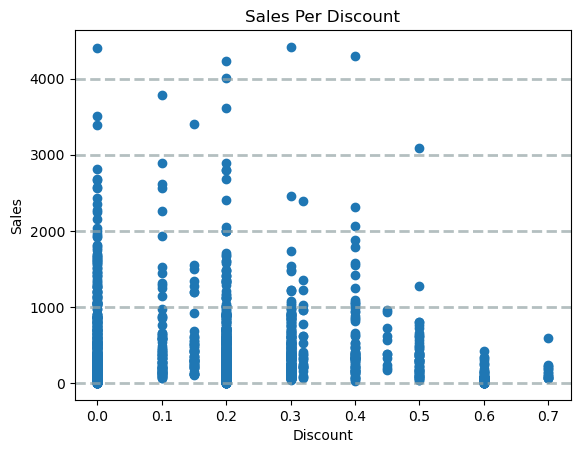

In [707]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a scatter plot of Discount and Sales
plt.scatter(x= df.Discount,y= df.Sales) 

# Customize the chart
plt.title('Sales Per Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

#### 1.3.4 Profit with respect to discount

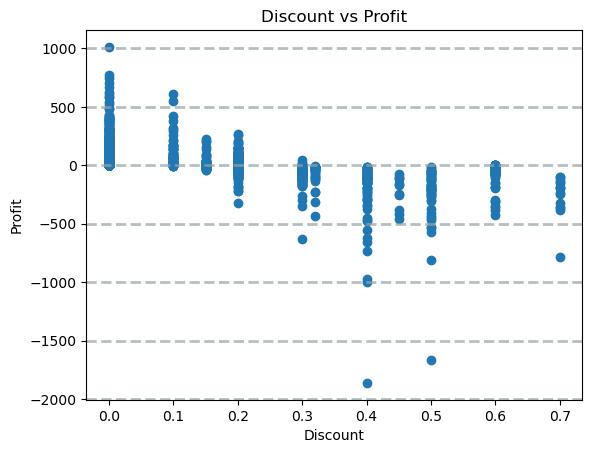

In [708]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a scatter plot of Discount and Profit
plt.scatter(x= df.Discount, y= df.Profit) 

# Customize the chart
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

#### 1.3.5 Profit with respect to quantity

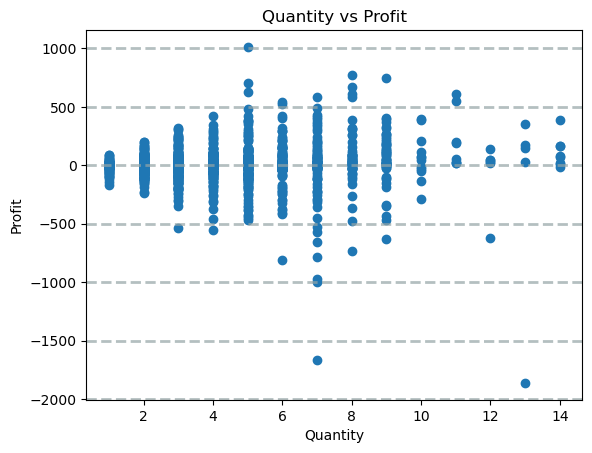

In [709]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a scatter plot of Quantity and Profit
plt.scatter(x= df.Quantity, y= df.Profit) 

# Customize the chart
plt.title('Quantity vs Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

#### 1.3.6 Data distribution for quantity

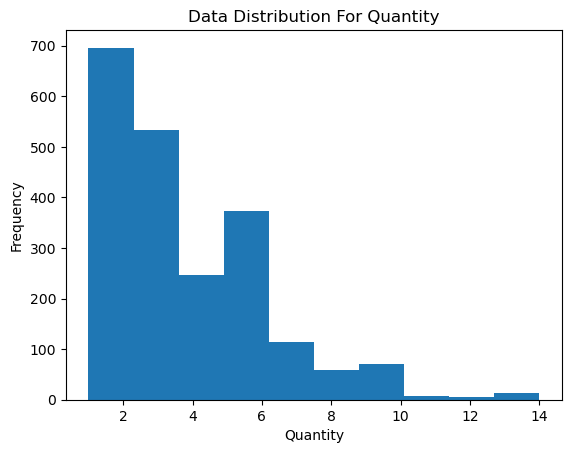

In [710]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Visualize the data as a histogram and see how frequently each value for the variable occurs.

# Plot a histogram
plt.hist(df['Quantity'])

# Add titles and labels
plt.title('Data Distribution For Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Show the plot
plt.show()

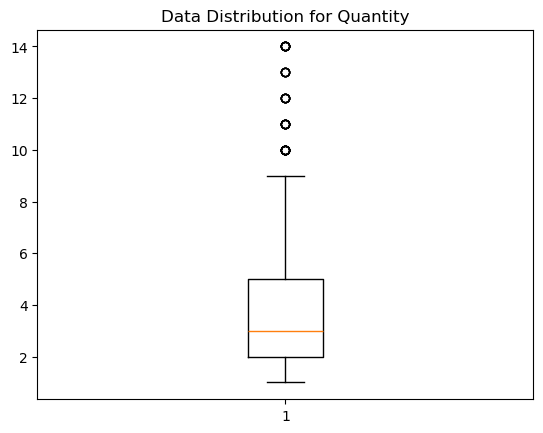

In [711]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Plot a box and whisker plots
plt.boxplot(df['Quantity'])

# Add titles and labels
plt.title('Data Distribution for Quantity')

# Show the plot
plt.show()

#### 1.3.7 Data distribution for discount

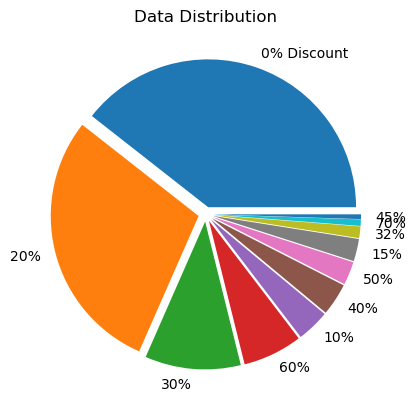

In [712]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Return a Series containing counts of each discount value.
var_data = df['Discount'].value_counts() 

# The result comes from var_date where the first element is the most frequently-occurring element.
labels = ['0% Discount','20%','30%','60%','10%','40%','50%','15%','32%','70%','45%'] 
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

# Plot a pie
plt.pie(var_data, labels=labels, explode=explode)

# Add titles
plt.title('Data Distribution')

# Show the plot
plt.show()

#### 1.3.8 Data distribution for Sales

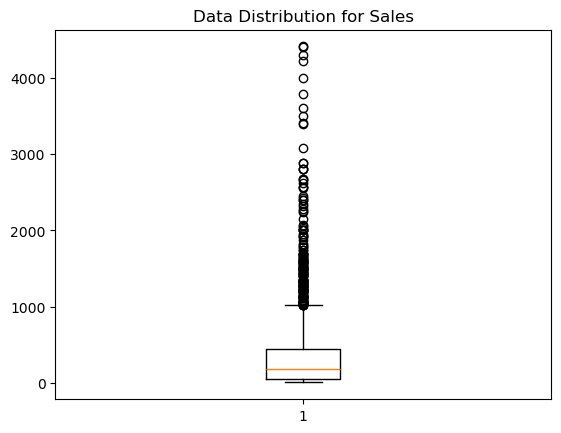

In [713]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Plot a box and whisker plots
plt.boxplot(df['Sales'])

# Add titles and labels
plt.title('Data Distribution for Sales')

# Show the figure
plt.show()

#### 1.3.9 Data distribution for profit

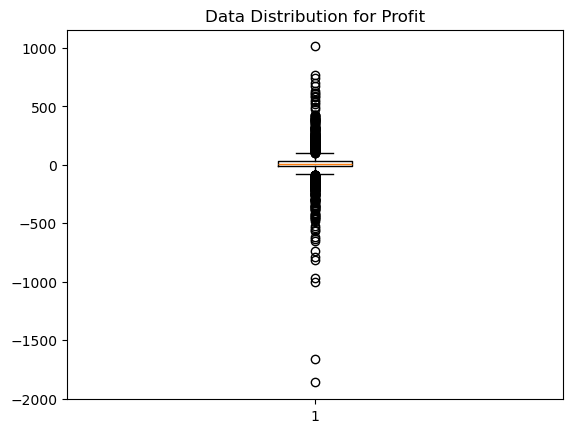

In [714]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Plot a box and whisker plots
plt.boxplot(df['Profit'])

# Add titles and labels
plt.title('Data Distribution for Profit')

# Show the plot
plt.show()

### 1.4 Convert data types

In [715]:
# Convert data types of columns as needed, ensuring all values fed into machine learning models are numerical.

# Date, ship mode, ID?, segment,


# Convert Date to Date type
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

df.info()
df.sort_values(by="Order Date", inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

## 2. Visualise Categorial columns and Date column

### 2.1 Sales and profit with respect to geographical features

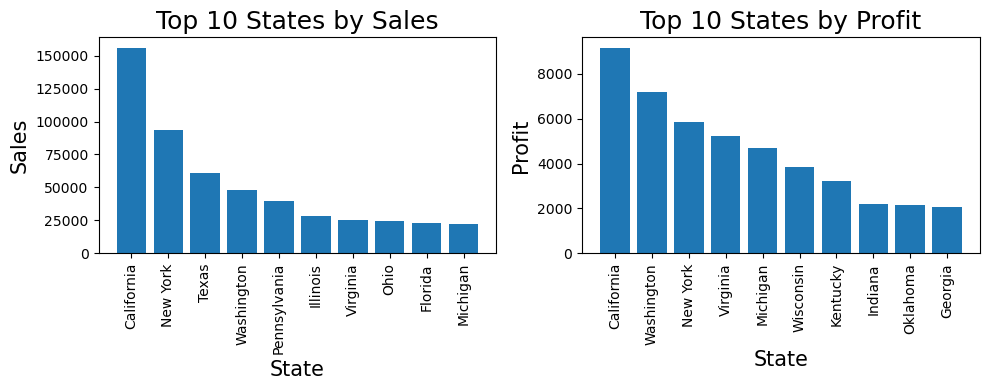

In [716]:
# Which states are generating the highest revenue and profit?

fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Sort the State as per the sales and profits, round to 2 decimal places and show the top 10 states.
top_state1 = df.groupby(['State'])[['Sales', 'Quantity']].sum().sort_values('Sales',ascending = False).round(2).head(10)
top_state2 = df.groupby(['State'])[['Sales', 'Quantity', 'Profit']].sum().sort_values('Profit',ascending = False).round(2).head(10)

# Since we have used groupby, we will have to reset the index to add the state into dataframe 
top_state1.reset_index(inplace=True) 
top_state2.reset_index(inplace=True) 

ax[0].bar(top_state1["State"],top_state1["Sales"])
ax[0].set_title("Top 10 States by Sales", fontsize=18) 
ax[0].set_xlabel("State",fontsize=15) # x axis shows the states 
ax[0].set_ylabel("Sales",fontsize=15) # y axis shows the Revenue
ax[0].tick_params(axis='x', labelrotation = 90)

ax[1].bar(top_state2["State"],top_state2["Profit"])
ax[1].set_title("Top 10 States by Profit", fontsize=18) 
ax[1].set_xlabel("State",fontsize=15) # x axis shows the states 
ax[1].set_ylabel("Profit",fontsize=15) # y axis shows the Profit
ax[1].tick_params(axis='x', labelrotation = 90)

plt.tight_layout()
plt.show()

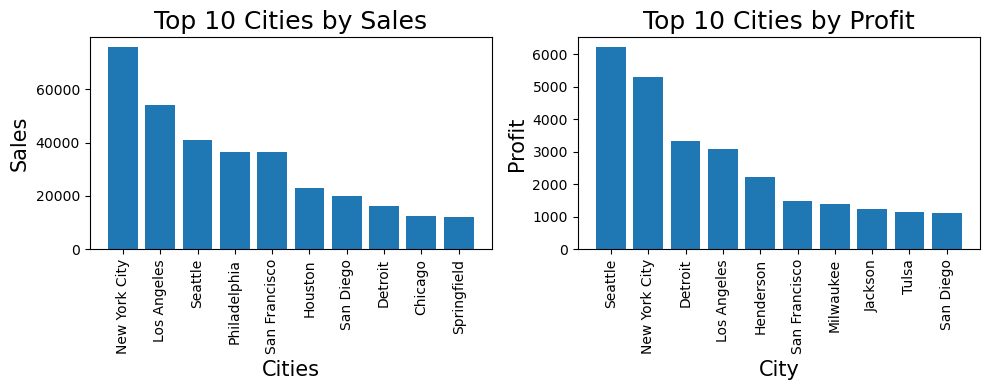

In [717]:
# Which cities are generating the highest revenue and profit?

fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Sort the City as per the sales and profits, round to 2 decimal places and show the top 10 states.
top_cities1 = df.groupby(['City'])[['Sales', 'Quantity']].sum().sort_values('Sales',ascending = False).round(2).head(10)
top_cities2= df.groupby(['City'])[['Sales', 'Quantity', 'Profit']].sum().sort_values('Profit',ascending = False).round(2).head(10)

# Since we have used groupby, we will have to reset the index to add the cities into dataframe 
top_cities1.reset_index(inplace=True) 
top_cities2.reset_index(inplace=True) 

ax[0].bar(top_cities1["City"],top_cities1["Sales"])
ax[0].set_title("Top 10 Cities by Sales", fontsize=18) 
ax[0].set_xlabel("Cities",fontsize=15) # x axis shows the cities 
ax[0].set_ylabel("Sales",fontsize=15) # y axis shows the Revenue
ax[0].tick_params(axis='x', labelrotation = 90)

ax[1].bar(top_cities2["City"],top_cities2["Profit"])
ax[1].set_title("Top 10 Cities by Profit", fontsize=18) 
ax[1].set_xlabel("City",fontsize=15) # x axis shows the cities 
ax[1].set_ylabel("Profit",fontsize=15) # y axis shows the Profit
ax[1].tick_params(axis='x', labelrotation = 90)

plt.tight_layout()
plt.show()

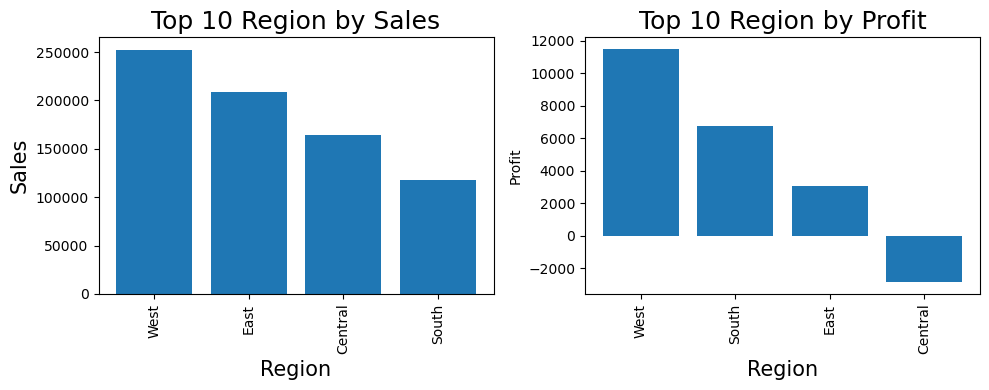

In [718]:
# Which regions are generating the highest revenue and profit?

fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Sort the regions as per the sales and profits, round to 2 decimal places.
top_region1 = df.groupby(['Region'])[['Sales', 'Quantity']].sum().sort_values('Sales',ascending = False).round(2)
top_region2= df.groupby(['Region'])[['Sales', 'Quantity', 'Profit']].sum().sort_values('Profit',ascending = False).round(2)

# Since we have used groupby, we will have to reset the index to add the region into dataframe 
top_region1.reset_index(inplace=True) 
top_region2.reset_index(inplace=True) 

ax[0].bar(top_region1["Region"],top_region1["Sales"])
ax[0].set_title("Top 10 Region by Sales", fontsize=18) 
ax[0].set_xlabel("Region",fontsize=15) # x axis shows the Region 
ax[0].set_ylabel("Sales",fontsize=15) # y axis shows the Revenue
ax[0].tick_params(axis='x', labelrotation = 90)

ax[1].bar(top_region2["Region"],top_region2["Profit"])
ax[1].set_title("Top 10 Region by Profit", fontsize=18) 
ax[1].set_xlabel("Region",fontsize=15) # x axis shows the Region 
ax[1].set_ylabel("Profit",fontsize=10) # y axis shows the Profit
ax[1].tick_params(axis='x', labelrotation = 90)

plt.tight_layout()
plt.show()

### 2.2 Find the valuable customers

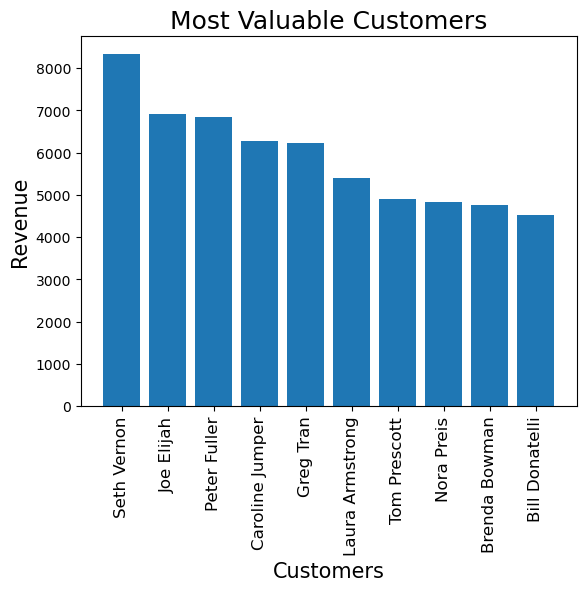

In [719]:
# Sort the customers name as per the sales, round to 2 decimal places and show the top 10 customers.
top_customer = df.groupby(['Customer Name'])[['Sales']].sum().sort_values('Sales',ascending = False).round(2).head(10)

# Since we have used groupby, we will have to reset the index to add the customer name into dataframe 
top_customer.reset_index(inplace=True) 

plt.title("Most Valuable Customers", fontsize=18) 
plt.bar(top_customer["Customer Name"], top_customer["Sales"])
plt.xlabel("Customers",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)

plt.show()

### 2.3 Sales, quantity and profit with respect to product features

In [720]:
# We have only Funiture under Category
df["Category"].unique()

array(['Furniture'], dtype=object)

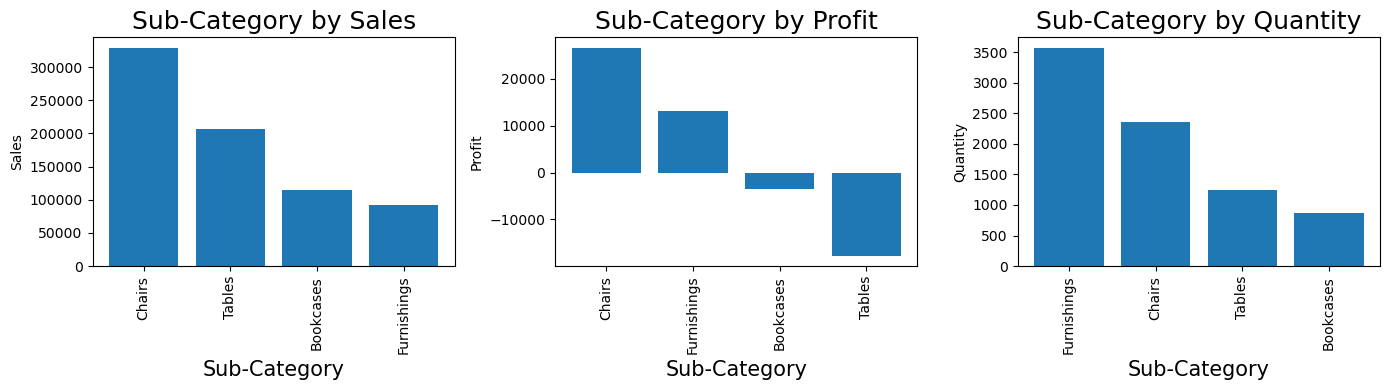

In [721]:
# Which sub-category are generating the highest revenue, quantity and profit?

fig, ax = plt.subplots(1, 3, figsize = (14,4))

# Sort the Sub-Category as per the sales, quantity and profits, round to 2 decimal places.
top_Subcategory1 = df.groupby(['Sub-Category'])[['Sales', 'Quantity']].sum().sort_values('Sales',ascending = False).round(2)
top_Subcategory2 = df.groupby(['Sub-Category'])[['Sales', 'Quantity', 'Profit']].sum().sort_values('Profit',ascending = False).round(2)
top_Subcategory3 = df.groupby(['Sub-Category'])[['Sales', 'Quantity']].sum().sort_values('Quantity',ascending = False).round(2)

# Since we have used groupby, we will have to reset the index to add the Sub-Category into dataframe 
top_Subcategory1.reset_index(inplace=True) 
top_Subcategory2.reset_index(inplace=True) 
top_Subcategory3.reset_index(inplace=True) 

ax[0].bar(top_Subcategory1["Sub-Category"],top_Subcategory1["Sales"])
ax[0].set_title("Sub-Category by Sales", fontsize=18) 
ax[0].set_xlabel("Sub-Category",fontsize=15) # x axis shows the Sub-Category 
ax[0].set_ylabel("Sales",fontsize=10) # y axis shows the Revenue
ax[0].tick_params(axis='x', labelrotation = 90)

ax[1].bar(top_Subcategory2["Sub-Category"],top_Subcategory2["Profit"])
ax[1].set_title("Sub-Category by Profit", fontsize=18) 
ax[1].set_xlabel("Sub-Category",fontsize=15) # x axis shows the Sub-Category 
ax[1].set_ylabel("Profit",fontsize=10) # y axis shows the Profit
ax[1].tick_params(axis='x', labelrotation = 90)

ax[2].bar(top_Subcategory3["Sub-Category"],top_Subcategory3["Quantity"])
ax[2].set_title("Sub-Category by Quantity", fontsize=18) 
ax[2].set_xlabel("Sub-Category",fontsize=15) # x axis shows the Sub-Category 
ax[2].set_ylabel("Quantity",fontsize=10) # y axis shows the Quantity
ax[2].tick_params(axis='x', labelrotation = 90)

plt.tight_layout()
plt.show()

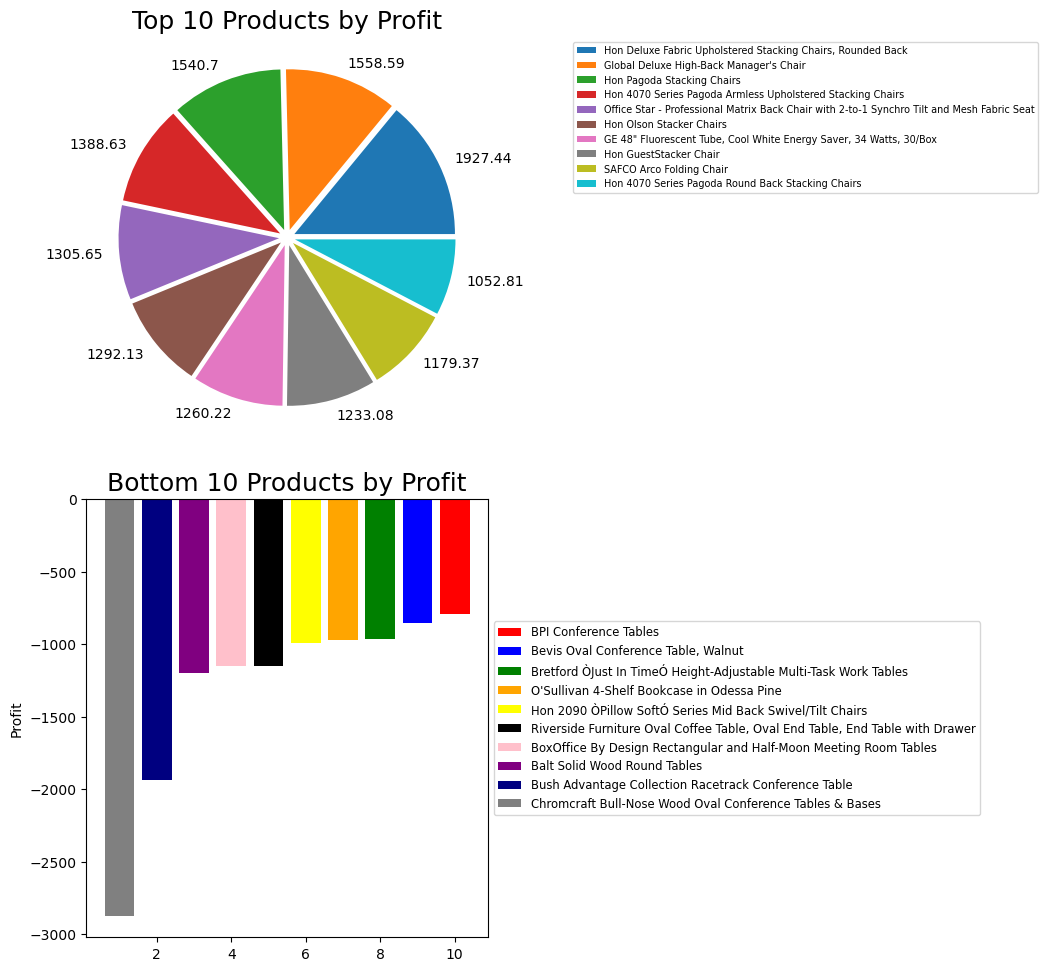

In [722]:
# Which Products are generating the highest and lowest profit?

fig, ax = plt.subplots(2, 1, figsize = (10,10))
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
# Sort the Products as per the profits, round to 2 decimal places and find top 10 and bottom 10.
top_product = df.groupby(['Product Name'])[['Sales', 'Quantity', 'Profit']].sum().sort_values('Profit',ascending = False).round(2).head(10)
bot_product = df.groupby(['Product Name'])[['Sales', 'Quantity', 'Profit']].sum().sort_values('Profit',ascending = False).round(2).tail(10)

# Since we have used groupby, we will have to reset the index to add the products into dataframe 
top_product.reset_index(inplace=True) 
bot_product.reset_index(inplace=True) 

ax[0].pie(top_product["Profit"], labels = top_product["Profit"], explode=explode)
ax[0].legend(labels = top_product["Product Name"], fontsize = 'x-small',loc="upper left", bbox_to_anchor=(1.2, 0, 0.5, 1))
ax[0].set_title("Top 10 Products by Profit", fontsize=18) 

ax[1].bar([10,9,8,7,6,5,4,3,2,1], bot_product["Profit"], label = bot_product["Product Name"], 
          color = ['red', 'blue', 'green', 'orange','yellow', 'black', 'pink', 'purple','navy', 'grey'])
ax[1].legend(fontsize = 'small',loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title("Bottom 10 Products by Profit", fontsize=18) 
ax[1].set_ylabel("Profit",fontsize=10) # y axis shows the Profit

plt.tight_layout()
plt.show()

### 2.4 Profit and order number with respect with segment

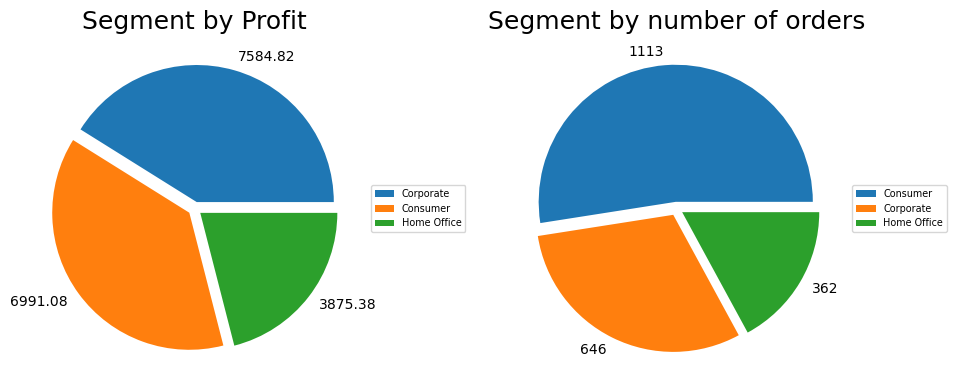

In [723]:
# Which segement are generating the highest profit and taking the most orders?

fig, ax = plt.subplots(1, 2, figsize = (10,4))
explode = (0.05,0.05,0.05)

# Sort the segment as per the profits and number of orders, round to 2 decimal places.
pro_segment= df.groupby(['Segment'])[['Sales', 'Quantity', 'Profit']].sum().sort_values('Profit',ascending = False).round(2)
ord_segment= df['Segment'].value_counts()

# Since we have used groupby, we will have to reset the index to add the segment into dataframe 
pro_segment.reset_index(inplace=True) 

ax[0].pie(pro_segment["Profit"], labels = pro_segment["Profit"], explode=explode)
ax[0].legend(labels = pro_segment["Segment"], fontsize = 'x-small',loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax[0].set_title("Segment by Profit", fontsize=18) 

ax[1].pie(ord_segment, labels = ord_segment, explode=explode)
ax[1].legend(labels = ['Consumer', 'Corporate', 'Home Office'], fontsize = 'x-small',loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title("Segment by number of orders", fontsize=18) 

plt.tight_layout()
plt.show()

### 2.5 Profit and order number with respect with shipping mode

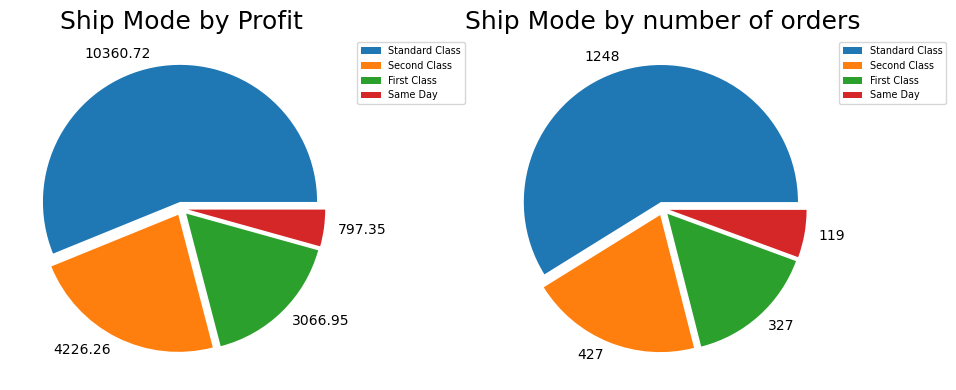

In [724]:
# What is the most preferred shipping mode among our customers and which is more profitable?

fig, ax = plt.subplots(1, 2, figsize = (10,4))
explode = (0.05,0.05,0.05,0.05)

# Sort the ship mode as per the profits and number of orders, round to 2 decimal places.
pro_shipmode= df.groupby(['Ship Mode'])[['Sales', 'Quantity', 'Profit']].sum().sort_values('Profit',ascending = False).round(2)
ord_shipmode= df['Ship Mode'].value_counts()

# Since we have used groupby, we will have to reset the index to add the ship mode into dataframe 
pro_shipmode.reset_index(inplace=True) 

ax[0].pie(pro_shipmode["Profit"], labels = pro_shipmode["Profit"], explode=explode)
ax[0].legend(labels = pro_shipmode["Ship Mode"], fontsize = 'x-small',loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
ax[0].set_title("Ship Mode by Profit", fontsize=18) 

ax[1].pie(ord_shipmode, labels = ord_shipmode, explode=explode)
ax[1].legend(labels = ['Standard Class', 'Second Class', 'First Class','Same Day'], fontsize = 'x-small',loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title("Ship Mode by number of orders", fontsize=18) 

plt.tight_layout()
plt.show()


### 2.6 Time Series Analysis of Sales, Profit and Quantity sold

In [725]:
print('Order Date Description\n') 
print(df['Order Date'].describe()) #Displays the distribution of dates in 'Order Data' column
print('\nShip Date Description\n')
print(df['Ship Date'].describe()) #Displays the distribution of dates in 'Ship Data' column

Order Date Description

count                             2121
mean     2016-04-30 03:54:13.748231680
min                2014-01-06 00:00:00
25%                2015-05-26 00:00:00
50%                2016-06-20 00:00:00
75%                2017-05-14 00:00:00
max                2017-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count                             2121
mean     2016-05-04 01:54:44.299858432
min                2014-01-10 00:00:00
25%                2015-05-31 00:00:00
50%                2016-06-23 00:00:00
75%                2017-05-18 00:00:00
max                2018-01-05 00:00:00
Name: Ship Date, dtype: object


In [726]:
# Create a new dataframe with only the target column i.e, the 'Sales','Quantity' and 'Profit' column and 'Order Date' as the index 
date_data = pd.DataFrame(df[['Order Date','Sales','Profit','Quantity']])
date_data["year"] = pd.DatetimeIndex(date_data['Order Date']).year
date_data["month"] = pd.DatetimeIndex(date_data['Order Date']).month

# Setting 'Order Date' as index of the dataframe 'date_data' for ease of Time Series Analysis
#date_data.set_index("Order Date", inplace = True) 
date_data

,Order Date,Sales,Profit,Quantity,year,month
1577,2014-01-06,2573.820,746.4078,9,2014,1
1626,2014-01-07,76.728,-53.7096,3,2014,1
181,2014-01-10,51.940,21.2954,1,2014,1
150,2014-01-11,9.940,3.0814,2,2014,1
631,2014-01-13,545.940,87.3504,6,2014,1
...,...,...,...,...,...,...
1619,2017-12-29,258.750,77.6250,3,2017,12
1617,2017-12-29,1207.840,314.0384,8,2017,12
1057,2017-12-29,101.120,37.4144,8,2017,12
1618,2017-12-29,300.980,87.2842,1,2017,12


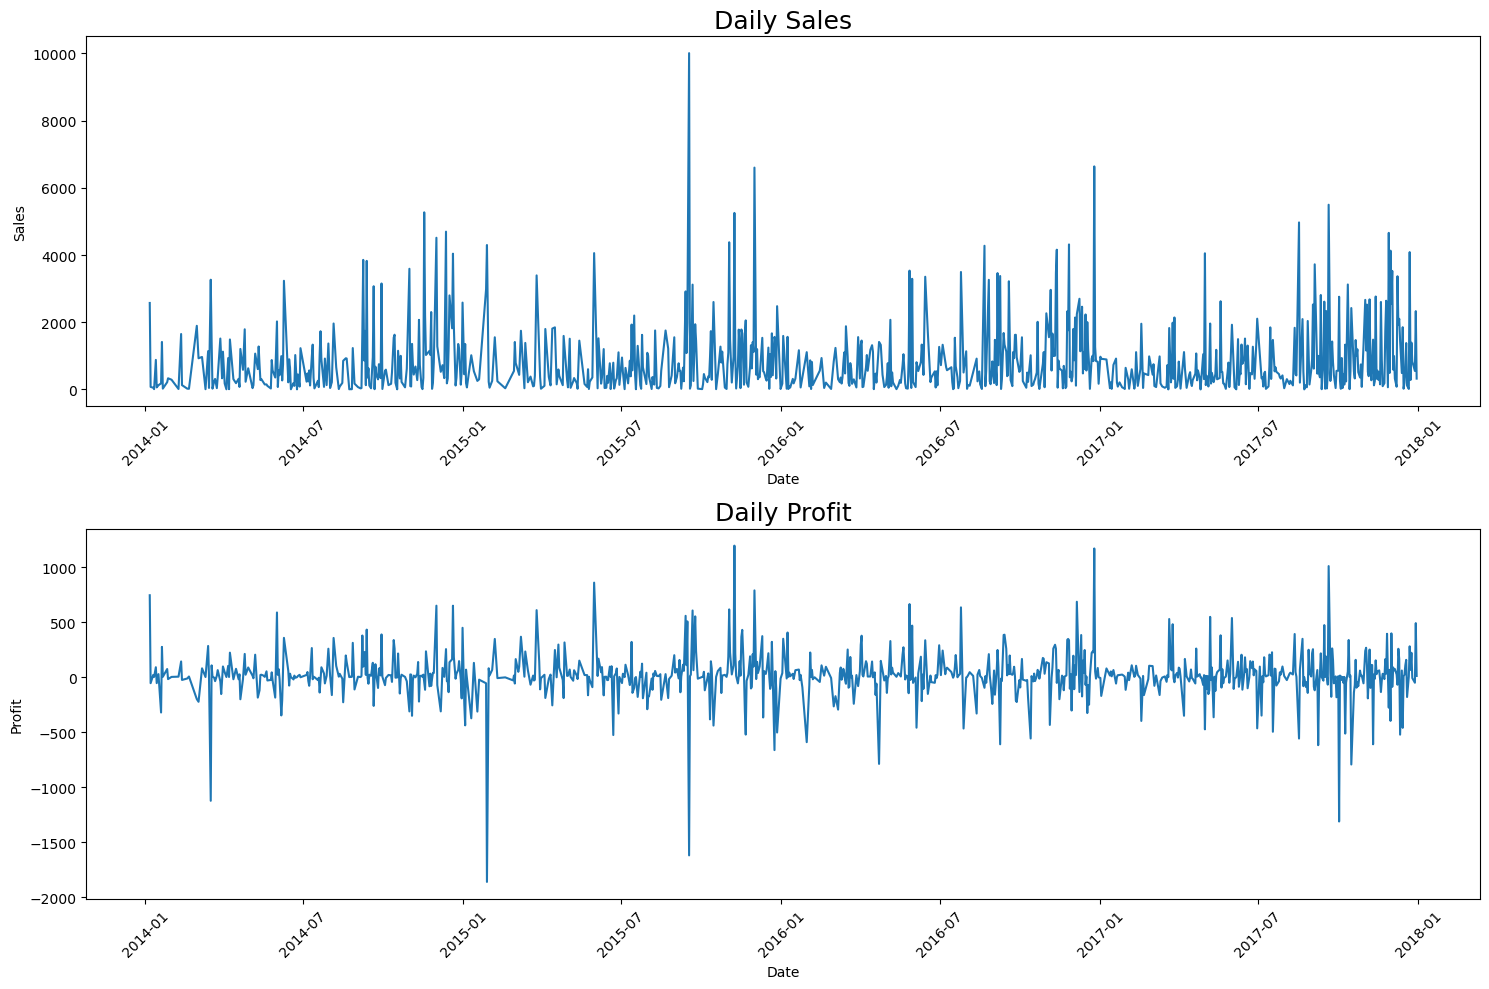

In [727]:
# Aggregate data into daily for visualization
fig, ax = plt.subplots(2, 1, figsize = (15,10))

# Sort the sales and profits as per the date, round to 2 decimal places.
daily_data = date_data.groupby("Order Date")[["Sales", "Profit"]].sum().round(2)

# Since we have used groupby, we will have to reset the index to add the order date into dataframe 
daily_data.reset_index(inplace=True) 

ax[0].plot(daily_data["Order Date"], daily_data[["Sales"]])
ax[0].set_title("Daily Sales", fontsize=18) 
ax[0].tick_params(axis='x', labelrotation = 45)
ax[0].set_xlabel("Date",fontsize=10) # x axis shows the Date
ax[0].set_ylabel("Sales",fontsize=10) # y axis shows the Revenue

ax[1].plot(daily_data["Order Date"], daily_data['Profit'])
ax[1].set_title("Daily Profit", fontsize=18) 
ax[1].tick_params(axis='x', labelrotation = 45)
ax[1].set_xlabel("Date",fontsize=10) # x axis shows the Date
ax[1].set_ylabel("Profit",fontsize=10) # y axis shows the Profit


plt.tight_layout()
plt.show()

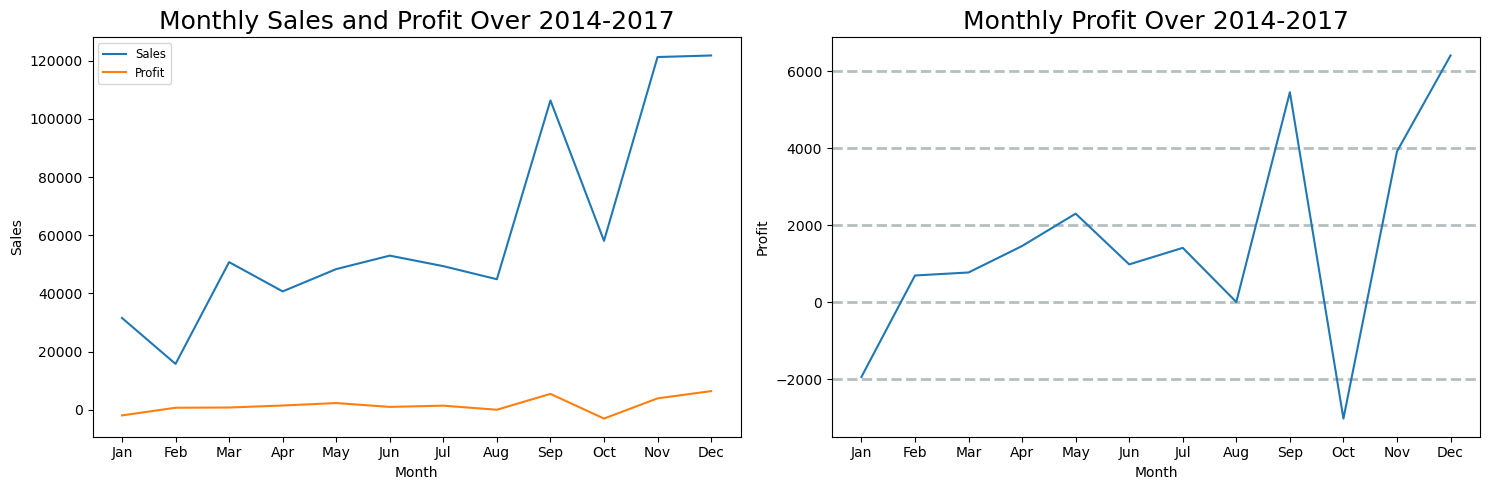

In [728]:
# Aggregate data into monthly for visualization
fig, ax = plt.subplots(1, 2, figsize = (15,5))
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Sort the sales and profits as per the date, round to 2 decimal places.
mon_data = date_data.groupby("month")[["Sales", "Profit"]].sum().round(2)

# Since we have used groupby, we will have to reset the index to add the order date into dataframe 
mon_data.reset_index(inplace=True) 

ax[0].plot(month, mon_data[["Sales", 'Profit']])
ax[0].set_title("Monthly Sales and Profit Over 2014-2017", fontsize=18)
ax[0].legend(labels = mon_data[["Sales", 'Profit']], fontsize = 'small',loc="upper left")
ax[0].set_xlabel("Month",fontsize=10) # x axis shows the Month
ax[0].set_ylabel("Sales",fontsize=10) # y axis shows the Revenue

ax[1].plot(month, mon_data['Profit'])
ax[1].set_title("Monthly Profit Over 2014-2017", fontsize=18)
ax[1].set_xlabel("Month",fontsize=10) # x axis shows the Month 
ax[1].set_ylabel("Profit",fontsize=10) # y axis shows the Profit

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

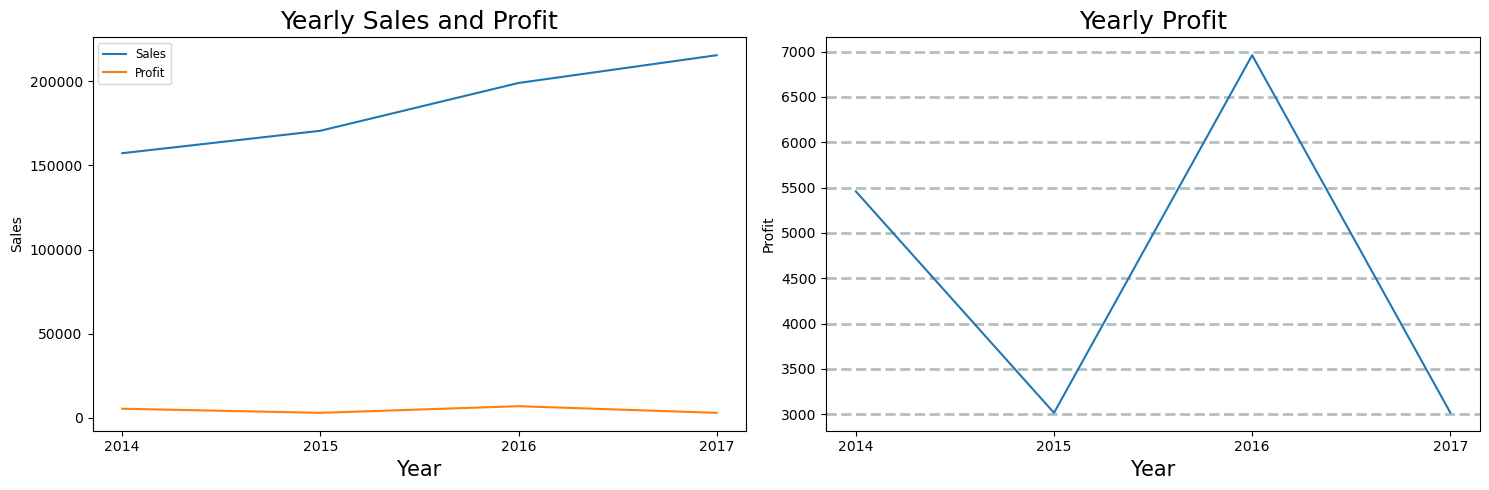

In [729]:
# Aggregate data into yearly for visualization
fig, ax = plt.subplots(1, 2, figsize = (15,5))
year = ["2014","2015","2016","2017"]

# Sort the sales and profits as per the date, round to 2 decimal places.
year_data = date_data.groupby("year")[["Sales", "Profit"]].sum().round(2)

# Since we have used groupby, we will have to reset the index to add the order date into dataframe 
year_data.reset_index(inplace=True) 

ax[0].plot(year, year_data[["Sales", 'Profit']])
ax[0].set_title("Yearly Sales and Profit", fontsize=18)
ax[0].legend(labels = year_data[["Sales", 'Profit']], fontsize = 'small',loc="upper left")
ax[0].set_xlabel("Year",fontsize=15) # x axis shows the year 
ax[0].set_ylabel("Sales",fontsize=10) # y axis shows the Revenue

ax[1].plot(year, year_data['Profit'])
ax[1].set_title("Yearly Profit", fontsize=18)
ax[1].set_xlabel("Year",fontsize=15) # x axis shows the year
ax[1].set_ylabel("Profit",fontsize=10) # y axis shows the profit

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

## 3. Clean data

### 3.1 Checking for missing values

In [730]:
# Checking for missing values/ duplicate values

df.info()
df.isnull().sum()

# No missing and duplicate values

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 1577 to 186
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 non-

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### 3.2 Checking for duplicate values

In [731]:
df.duplicated().sum()

0

### 3.3 Checking for outliers

In [732]:
# Outliers by removing them and standardising/normalising them so that all our feature ranges are similar to each other, which helps our model learn better.

# All column (numerical) values are within 3 standard deviations from the mean
cols = df[["Sales","Profit"]].columns 
df_sub = df.copy()
df_sub1 = df[["Sales","Profit"]]

# z-score filter: z-score < 3
lim = np.abs((df_sub1 - df_sub1.mean()) / df_sub1.std(ddof=0)) < 3

# replace outliers with nan
df_sub.loc[:, cols] = df_sub1.where(lim, np.nan)

# drop rows with NaN in any column
df_sub.dropna(inplace=True) 

df_sub.iloc[0:10]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1626,7661,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.60,-53.7096
181,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.00,21.2954
150,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.00,3.0814
631,2979,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.00,87.3504
1024,4939,CA-2014-157147,2014-01-13,2014-01-18,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,San Francisco,...,94109,West,FUR-BO-10003034,Furniture,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",333.999,3,0.15,3.9294
1355,6475,CA-2014-149524,2014-01-14,2014-01-15,First Class,BS-11590,Brendan Sweed,Corporate,United States,Philadelphia,...,19140,East,FUR-BO-10003433,Furniture,Bookcases,Sauder Cornerstone Collection Library,61.960,4,0.50,-53.2856
200,971,CA-2014-115791,2014-01-16,2014-01-18,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Philadelphia,...,19134,East,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,127.104,6,0.20,28.5984
1131,5466,CA-2014-146591,2014-01-19,2014-01-20,First Class,TS-21340,Toby Swindell,Consumer,United States,Scottsdale,...,85254,West,FUR-BO-10001972,Furniture,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,181.470,5,0.70,-320.5970
1326,6328,CA-2014-167927,2014-01-20,2014-01-26,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,...,48185,Central,FUR-FU-10002918,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,272.940,3,0.00,30.0234
1327,6333,CA-2014-167927,2014-01-20,2014-01-26,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,...,48185,Central,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,14.730,3,0.00,4.8609


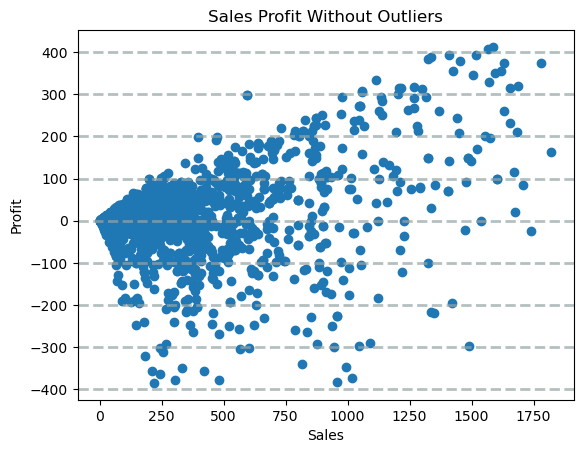

In [735]:
# Create a scatter plot of Sales vs Profit
plt.scatter(x= df_sub.Sales, y= df_sub.Profit) 
plt.title('Sales Profit Without Outliers')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

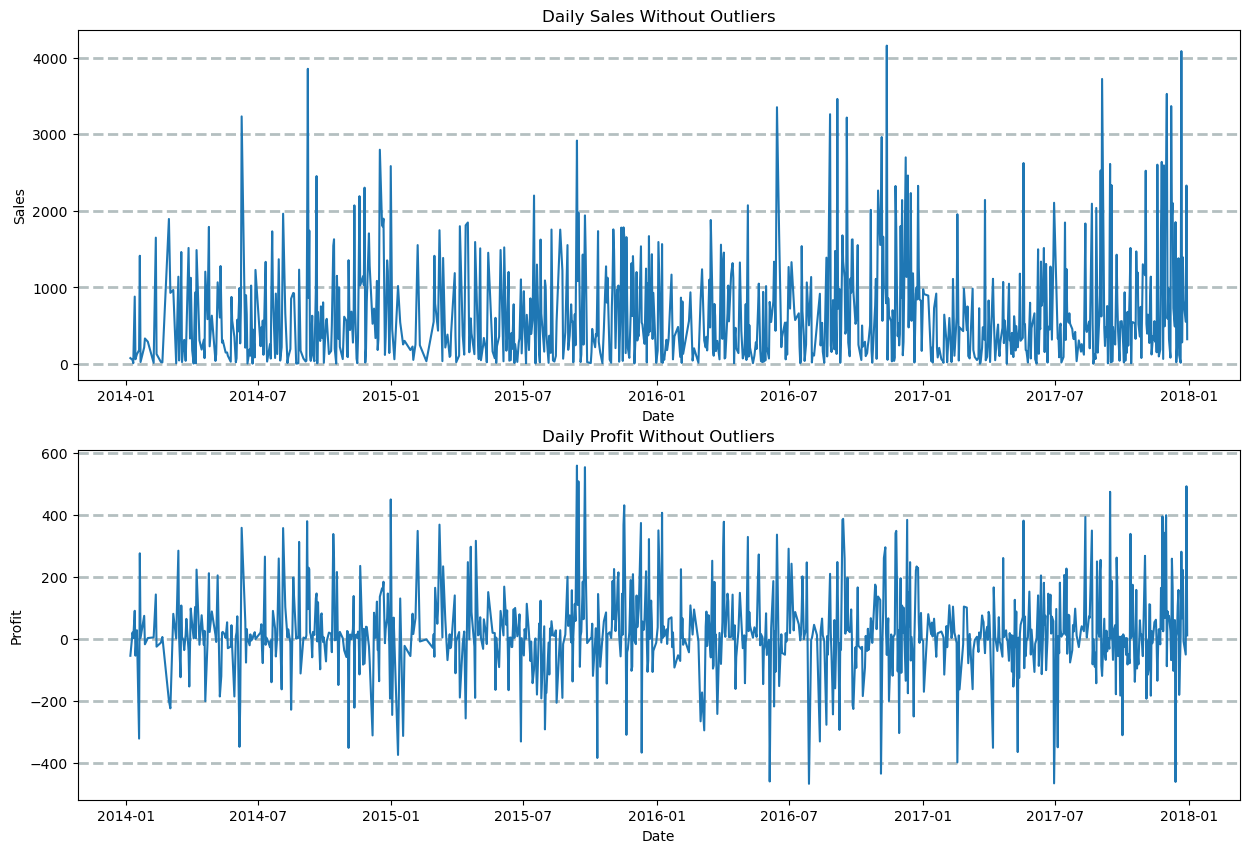

In [736]:
# Visualize numerical columns without outliers.
fig, ax = plt.subplots(2, 1, figsize = (15,10))
daily_data_sub = df_sub.groupby("Order Date")[["Sales", "Profit"]].sum().round(2)
daily_data_sub.reset_index(inplace=True)

# Create a line plot for Sales
ax[0].plot(daily_data_sub["Order Date"], daily_data_sub['Sales'])
ax[0].set_title('Daily Sales Without Outliers')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Sales')
ax[0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Create a line plot for Profit
ax[1].plot(daily_data_sub["Order Date"], daily_data_sub['Profit'])
ax[1].set_title("Daily Profit Without Outliers")
ax[1].set_xlabel("Date",fontsize=10) # x axis shows the Date
ax[1].set_ylabel("Profit",fontsize=10) # y axis shows the Profit
ax[1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

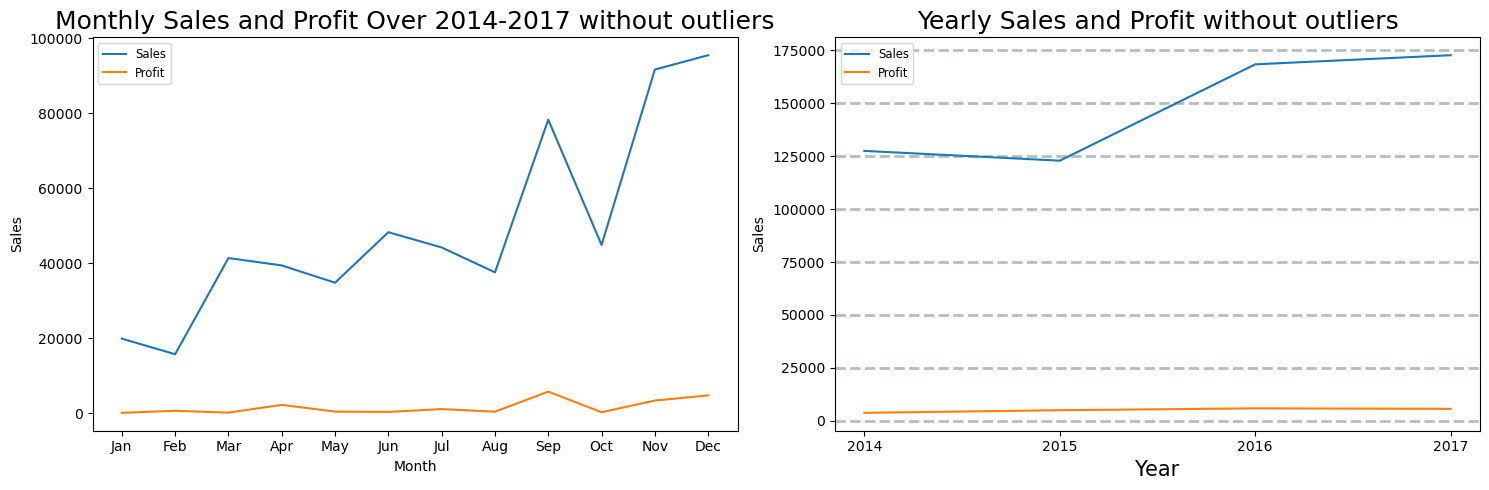

In [743]:
# Aggregate data into monthly and yearly for visualization without outliers
fig, ax = plt.subplots(1, 2, figsize = (15,5))
date_sub = pd.DataFrame(df_sub[['Order Date','Sales','Profit','Quantity']])
date_sub["year"] = pd.DatetimeIndex(df_sub['Order Date']).year
date_sub["month"] = pd.DatetimeIndex(df_sub['Order Date']).month

# Sort the sales and profits as per the date, round to 2 decimal places.
mon_data1 = date_sub.groupby("month")[["Sales", "Profit"]].sum().round(2)
year_data1 = date_sub.groupby("year")[["Sales", "Profit"]].sum().round(2)

# Since we have used groupby, we will have to reset the index to add the order date into dataframe 
mon_data1.reset_index(inplace=True) 
year_data1.reset_index(inplace=True) 

ax[0].plot(month, mon_data1[["Sales", 'Profit']])
ax[0].set_title("Monthly Sales and Profit Over 2014-2017 without outliers", fontsize=18)
ax[0].legend(labels = mon_data1[["Sales", 'Profit']], fontsize = 'small',loc="upper left")
ax[0].set_xlabel("Month",fontsize=10) # x axis shows the Month
ax[0].set_ylabel("Sales",fontsize=10) # y axis shows the Revenue

ax[1].plot(year, year_data1[["Sales", 'Profit']])
ax[1].set_title("Yearly Sales and Profit without outliers", fontsize=18)
ax[1].legend(labels = year_data1[["Sales", 'Profit']], fontsize = 'small',loc="upper left")
ax[1].set_xlabel("Year",fontsize=15) # x axis shows the year 
ax[1].set_ylabel("Sales",fontsize=10) # y axis shows the Revenue

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

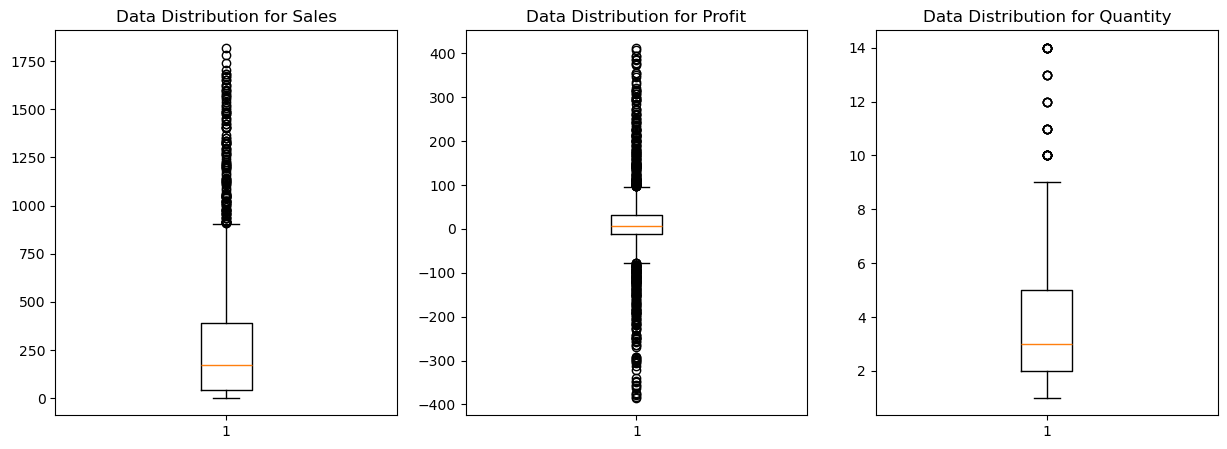

In [744]:
# Visualize numerical columns without outliers.
fig, ax = plt.subplots(1, 3, figsize = (15,5))

# Plot a box and whisker plots
ax[1].boxplot(df_sub.Profit)
ax[1].set_title('Data Distribution for Profit')

ax[0].boxplot(df_sub.Sales)
ax[0].set_title('Data Distribution for Sales')

ax[2].boxplot(df_sub.Quantity)
ax[2].set_title('Data Distribution for Quantity')
# Show the plot
plt.show()

### 3.4 Checking for imbalanced data

In [738]:
# Imbalanced data by undersampling/oversampling for a particular label.

# The undersampling methods work with the majority class. 
# In these methods, we randomly eliminate instances of the majority class. 
# It reduces the number of observations from majority class to make the dataset balanced. 
# It results in severe loss of information. 
# This method is applicable when the dataset is huge and reducing the number of training samples make the dataset balanced.

df_sub["Segment"].value_counts()
#df_sub["Region"].value_counts()




Segment
Consumer       1076
Corporate       627
Home Office     348
Name: count, dtype: int64

In [739]:
# Imbalanced data by undersampling/oversampling for a particular label.

# A classification data set with skewed class proportions is called imbalanced. 
# Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

df_sub["Ship Mode"].value_counts()
#df_sub["Sub-Category"].value_counts()
#df_sub["State"].value_counts()

# While Region has little imbalance, so it should not cause any significant performance degradation. When preforming 

Ship Mode
Standard Class    1204
Second Class       409
First Class        321
Same Day           117
Name: count, dtype: int64

### 3.5 Checking for feature selection

In [740]:
# Feature selection by selecting the most important features to feed into our model while ignoring any insignificant features.

#df.drop('Country',axis=1,inplace=True)
#df.drop('Row ID',axis=1,inplace=True)

### 3.6 Checking for Data types

In [745]:
# Convert data types
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 1626 to 186
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2051 non-null   int64         
 1   Order ID       2051 non-null   object        
 2   Order Date     2051 non-null   datetime64[ns]
 3   Ship Date      2051 non-null   datetime64[ns]
 4   Ship Mode      2051 non-null   object        
 5   Customer ID    2051 non-null   object        
 6   Customer Name  2051 non-null   object        
 7   Segment        2051 non-null   object        
 8   Country        2051 non-null   object        
 9   City           2051 non-null   object        
 10  State          2051 non-null   object        
 11  Postal Code    2051 non-null   int64         
 12  Region         2051 non-null   object        
 13  Product ID     2051 non-null   object        
 14  Category       2051 non-null   object        
 15  Sub-Category   2051 non-

## 4. Identify correlated variables

In [742]:
#

## 5. Summary

## Bonus